In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
songs = ['Frozen', 'Hakuna', 'Potter', 'Mamma', 'Panther', 'Rain', 'Showman', 'StarWars']

### Load and prepare the data for training

In [3]:
def load_data():
    X = np.load('mfcc_data.npy')
    y = np.load('labels.npy')

    return X, y

X, y = load_data() 

X = np.transpose(X, (0, 2, 1))

y_encoded = LabelEncoder().fit_transform(y)
y_onehot = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=69)

print(X_train.shape)
print(y_train.shape)

(3848, 603, 128)
(3848, 8)


### Model: Simple RNN with LSTM

In [4]:
model = Sequential([
    LSTM(512, input_shape=(X.shape[1], X.shape[2]), return_sequences=True),
    LSTM(512),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 603, 512)          1312768   
                                                                 
 lstm_1 (LSTM)               (None, 512)               2099200   
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 3,545,352
Trainable params: 3,545,352
Non-trainable params: 0
_________________________________________________________________


### Training

In [5]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
97/97 [==============================] - 32s 268ms/step - loss: 2.0908 - accuracy: 0.1530 - val_loss: 2.0269 - val_accuracy: 0.1818
Epoch 2/50
97/97 [==============================] - 26s 270ms/step - loss: 2.0135 - accuracy: 0.2135 - val_loss: 1.9744 - val_accuracy: 0.2506
Epoch 3/50
97/97 [==============================] - 26s 268ms/step - loss: 1.9476 - accuracy: 0.2570 - val_loss: 1.9400 - val_accuracy: 0.2701
Epoch 4/50
97/97 [==============================] - 27s 274ms/step - loss: 1.8852 - accuracy: 0.2924 - val_loss: 1.8163 - val_accuracy: 0.3247
Epoch 5/50
97/97 [==============================] - 26s 270ms/step - loss: 1.7805 - accuracy: 0.3437 - val_loss: 1.7908 - val_accuracy: 0.3429
Epoch 6/50
97/97 [==============================] - 26s 268ms/step - loss: 1.7134 - accuracy: 0.3889 - val_loss: 1.7781 - val_accuracy: 0.3442
Epoch 7/50
97/97 [==============================] - 26s 271ms/step - loss: 1.6522 - accuracy: 0.4211 - val_loss: 1.7084 - val_accuracy: 0.3818

### Plot loss over epochs

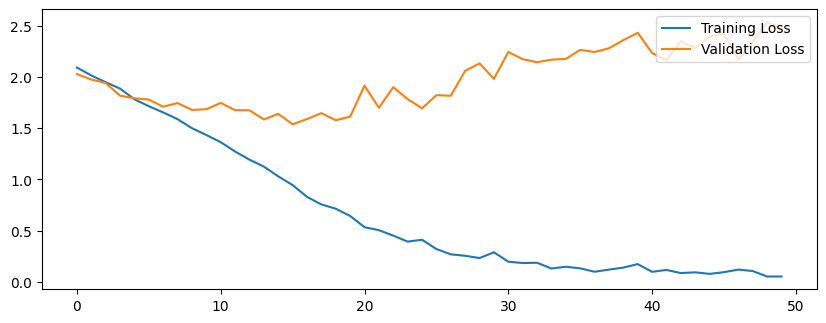

In [6]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')


### Plot accuracy over epochs

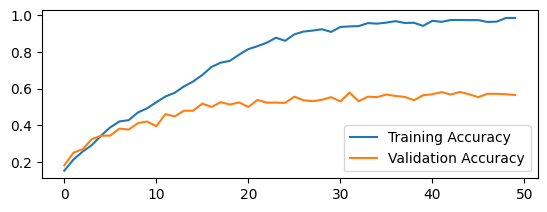

In [7]:
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')

Looking at the plots, we can see that the validation loss starts to increase after around 15 epochs while the training loss continues to decrease. This is a sign of overfitting. The validation accuracy also starts to level off after around 15 epochs. This means we can stop training after 15 epochs to prevent overfitting.

### Evaluate on test data

In [8]:
model.evaluate(X_test, y_test)

31/31 [==============================] - 1s 44ms/step - loss: 2.4784 - accuracy: 0.5759


[2.478440284729004, 0.5758835673332214]

### Confusion matrix

In [17]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

tf.math.confusion_matrix(y_true, y_pred)

31/31 [==============================] - 2s 40ms/step


<tf.Tensor: shape=(8, 8), dtype=int32, numpy=
array([[78,  5,  4, 10,  4,  3,  5,  5],
       [ 4, 68, 12,  6,  3,  5, 14, 11],
       [ 5, 18, 71, 11,  2,  2,  2, 15],
       [ 9,  6,  7, 73, 12,  2,  0,  7],
       [14,  4,  4, 16, 80,  6,  6,  4],
       [ 7,  5,  4,  4,  2, 71,  9,  9],
       [ 3,  9,  2,  4,  1,  3, 80, 11],
       [ 6, 11,  7, 14,  6,  1,  4, 76]])>